# AQI Predictor (Air_Quality Dataset of 2015-2020)
##### MADE BY : DIVESH THAKUR

### 1. IMPORTING NECESSARY LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

### 1.2. LOADING DATASET & PREPROCESSING:

In [2]:
df=pd.read_csv('Air_Quality.csv',parse_dates = ["Date"],usecols=['City','Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3','CO','SO2','O3','AQI','AQI_Bucket'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN


In [3]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
AQI            4681
AQI_Bucket     4681
dtype: int64


In [4]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

PM10          37.723071
NH3           34.973418
AQI_Bucket    15.851139
AQI           15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64

In [5]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,13.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,81.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,118.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,2049.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,140.696585


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  AQI          24850 non-null  float64       
 12  Air_quality  24850 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 2.9+ MB


### 2. FEATURE ENGINEERING:

In [8]:
# identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, AQI, Air_quality]
Index: []


In [9]:
# count the number of duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [10]:
# For calculating the AQI we will replace all the NaN values of columns PM2.5, PM10, NO, NO2, NOx,
# NH3, CO, SO2, O3 with the mean values
# Apply fill only to numeric columns
df.iloc[:, 2:11] = df.iloc[:, 2:11].fillna(df.iloc[:, 2:11].mean())
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Satisfactory


#### AQI null values cant be replaced by Mean/Mode 
It'll be using 7 measures : PM2.5, PM10, SO2, NOx, NH3, CO and O3
> For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

> For CO and O3 the maximum value in last 8-hrs is used.

> Each measure is converted into a Sub-Index based on pre-defined groups.

> Sometimes measures are not available due to lack of measuring or lack of required data points.

> Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

### 2.1. Calculating Sub-Index:

In [11]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [12]:
if pd.isna(df["AQI"]).any():
        df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,149.0,NaN,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,123.0,NaN,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,300.0,NaN,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,123.0,NaN,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,329.0,NaN,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Satisfactory,49.0,26.666667,11.25,22.50,2.50,0.000000,28.000000


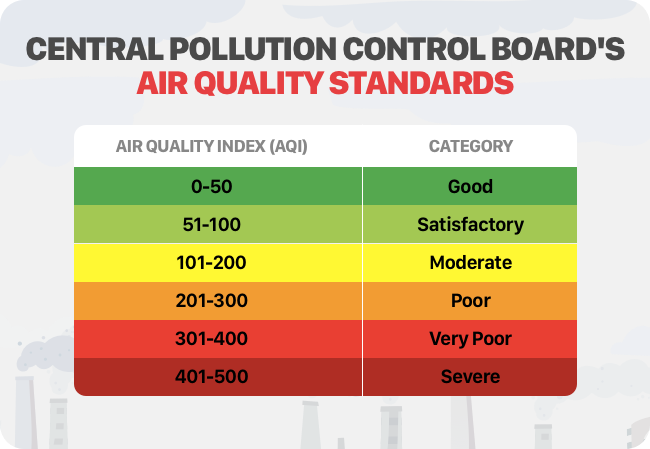

In [13]:
# Now for removing NaN values of Air_quality we use AQI category
from IPython import display 
display.Image("https://w.ndtvimg.com/sites/3/2019/12/18122812/air_pollution_standards_cpcb.png",width = 400, height = 200)

In [14]:
if pd.isna(df["Air_quality"]).any():
        def get_Air_quality(x):
            if x <= 50:
                return "Good"
            elif x > 50 and x <= 100:
                return "Satisfactory"
            elif x > 100 and x <= 200:
                return "Moderate"
            elif x > 200 and x <= 300:
                return "Poor"
            elif x > 300 and x <= 400:
                return "Very Poor"
            elif x > 400:
                return "Severe"
            else:
                return '0'

        df["Air_quality"] = df["Air_quality"].fillna(df["AQI"].apply(lambda x: get_Air_quality(x)))
        
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,149.0,Moderate,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,123.0,Moderate,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,300.0,Poor,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,123.0,Moderate,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,329.0,Very Poor,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Satisfactory,49.0,26.666667,11.25,22.50,2.50,0.000000,28.000000


In [15]:
# Remove the PM10_SubIndex, PM2.5_SubIndex, SO2_SubIndex, NOx_SubIndex, NH3_SubIndex, CO_SubIndex, and O3_SubIndex columns
# because now they are of no use for further process.
df = df.drop(columns=["PM10_SubIndex", "PM2.5_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,149.0,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,123.0,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,300.0,Poor
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,123.0,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,329.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Satisfactory


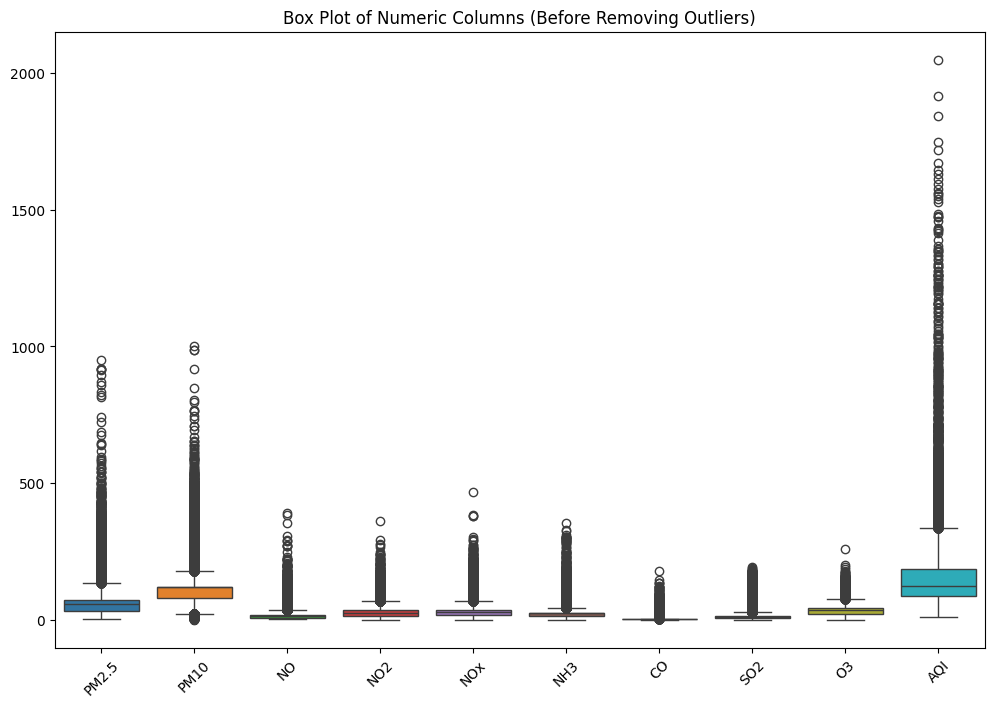

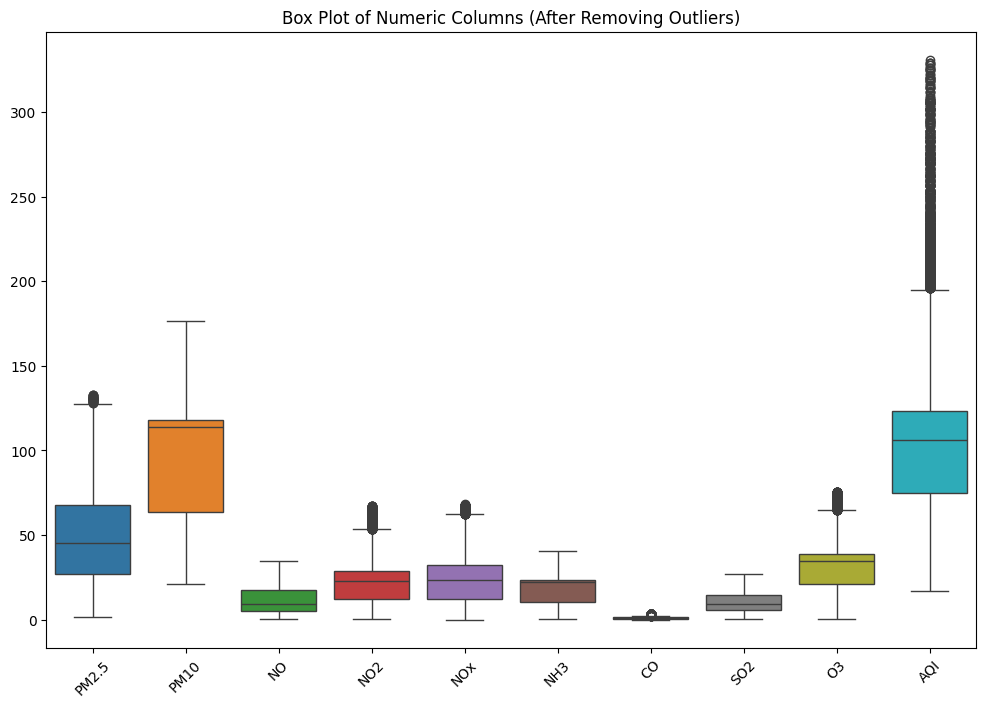

In [16]:
# Select numeric columns for outlier visualization
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

# Create a box plot for each numeric column before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

# Remove outliers from the dataset
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot for each numeric column after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()


### 3. EXPLORATORY DATA ANALYSIS:

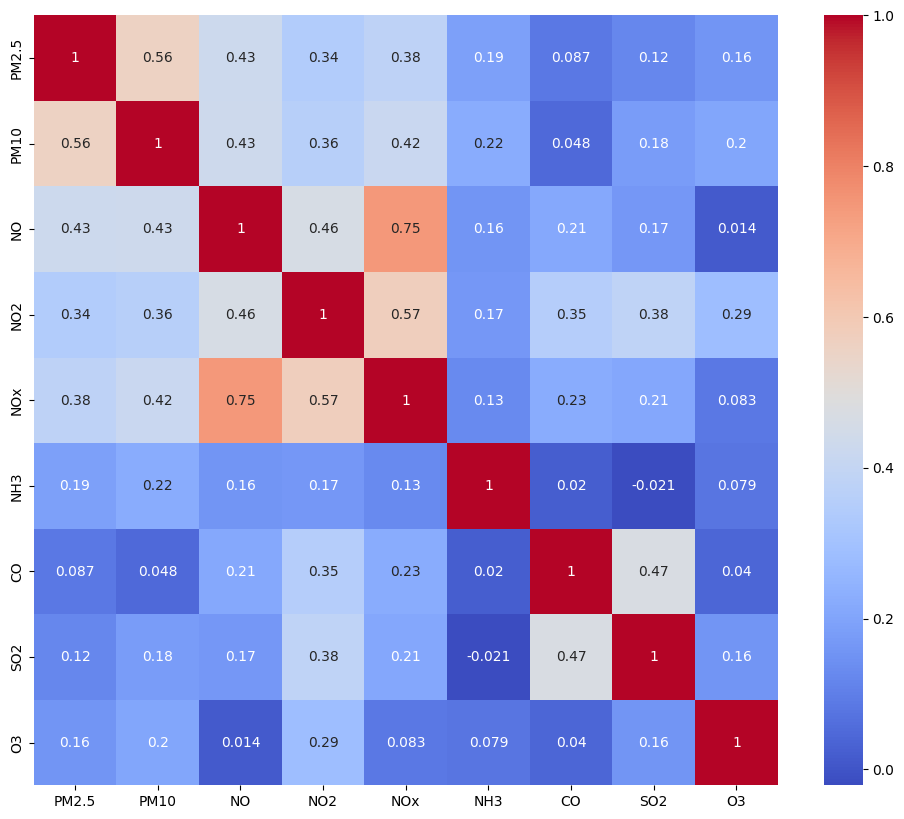

In [17]:
#plt.figure(figsize=(12,10))
#sns.heatmap(df_cleaned.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
newdf=df.iloc[:,2:11]
plt.figure(figsize=(12,10))
sns.heatmap(newdf.corr(),cmap='coolwarm',annot=True);

In [18]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

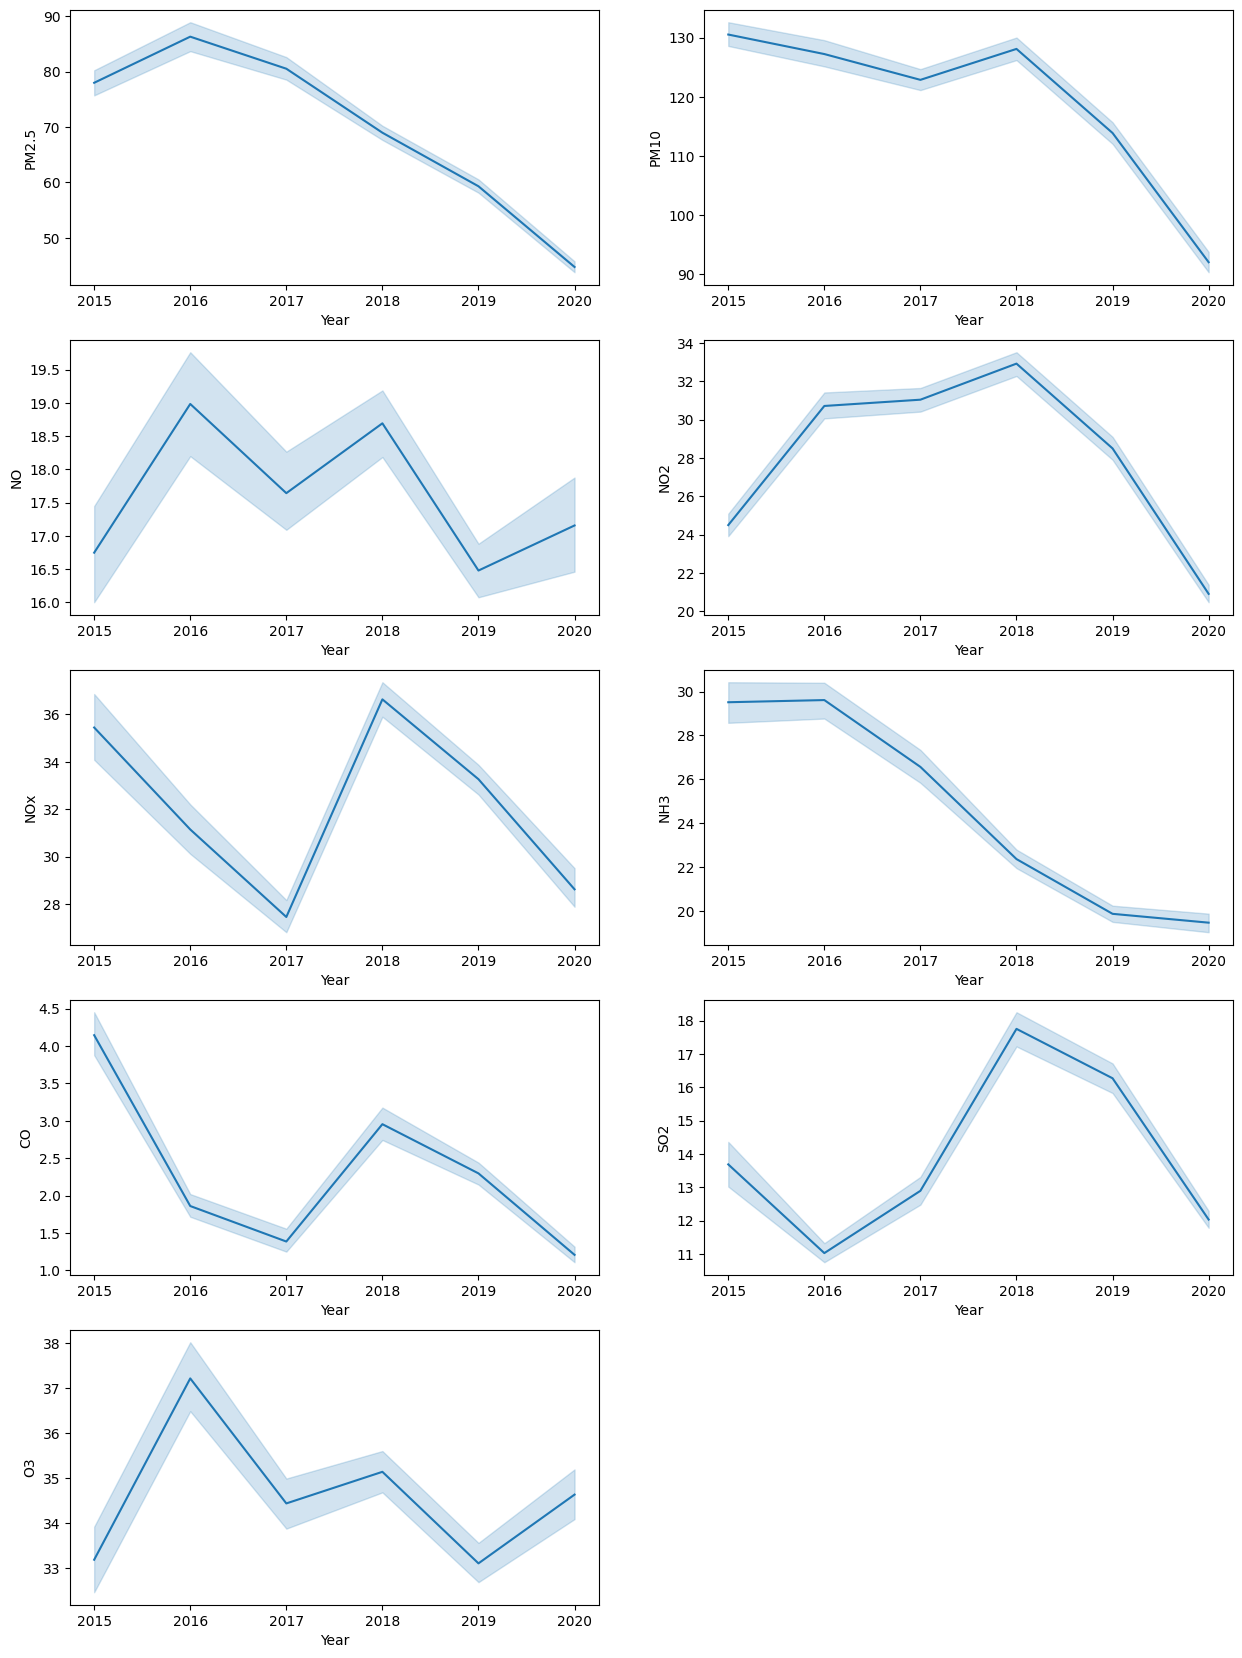

In [19]:
#line plot analysis for amount of particulate matter and gases  over the years
cols=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

In [20]:
'''Here I divided the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) &
Industrial Pollution content (CO, SO2, O3) and find how these contents correlated with AQI (air quality index)'''
df2 = df.copy()
df2['Vehicular_Pollution_content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial_Pollution_content'] = df2['SO2']+df2['O3']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   AQI                           29531 non-null  float64       
 3   Air_quality                   29531 non-null  object        
 4   Month                         29531 non-null  object        
 5   Year                          29531 non-null  object        
 6   Vehicular_Pollution_content   29531 non-null  float64       
 7   Industrial_Pollution_content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ MB


In [21]:
df2.set_index("City", inplace=True)
df2.head()

,Date,AQI,Air_quality,Month,Year,Vehicular_Pollution_content,Industrial_Pollution_content
City,,,,,,,
Ahmedabad,2015-01-01,149.0,Moderate,1,2015,246.271157,161.00
Ahmedabad,2015-01-02,123.0,Moderate,1,2015,243.151157,58.61
Ahmedabad,2015-01-03,300.0,Poor,1,2015,292.861157,59.77
Ahmedabad,2015-01-04,123.0,Moderate,1,2015,248.911157,54.67
Ahmedabad,2015-01-05,329.0,Very Poor,1,2015,312.441157,78.64


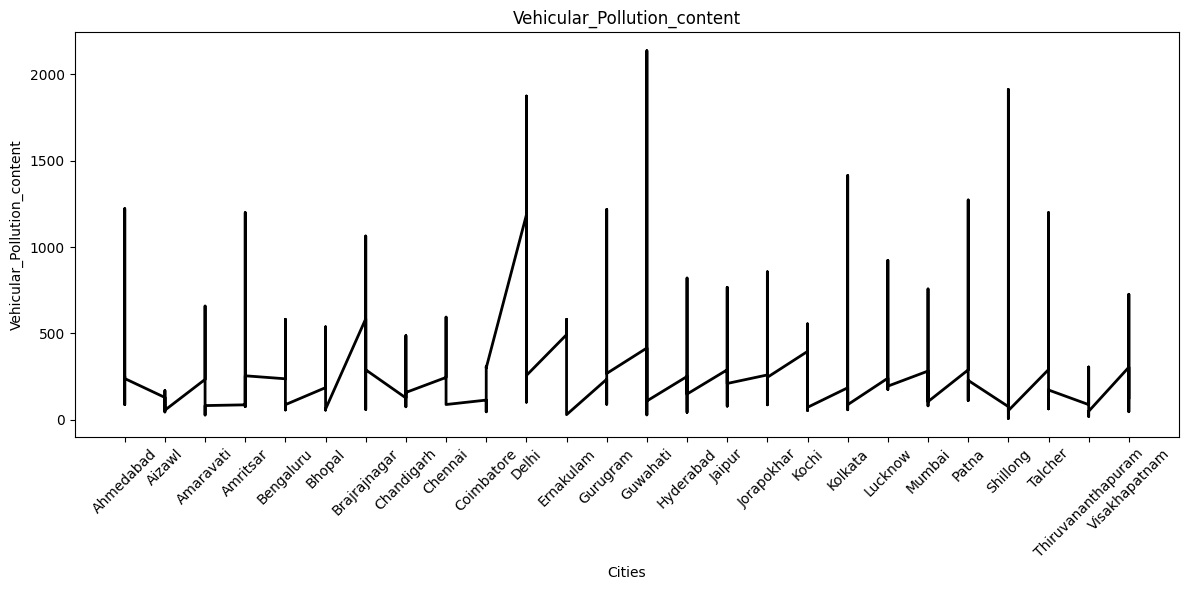

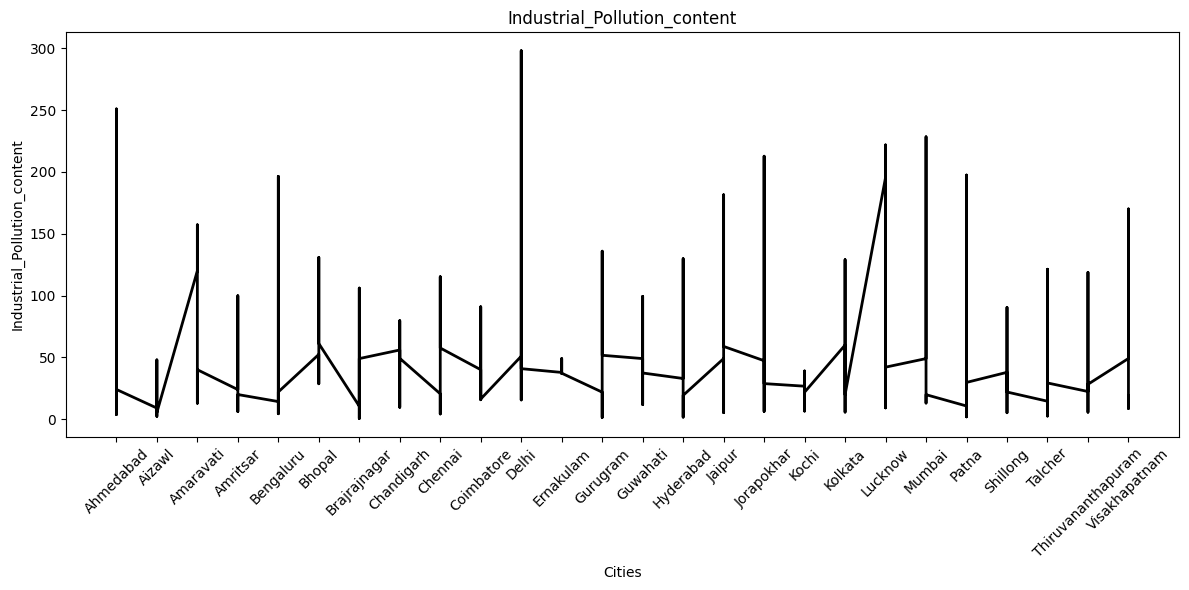

In [22]:
def ploting(var):
    plt.figure(figsize=(12, 6))
    plt.plot(df2.index, df2[var], color='black', linewidth=2)
    plt.title(var)
    plt.xlabel('Cities')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
ploting('Vehicular_Pollution_content')
ploting('Industrial_Pollution_content') 

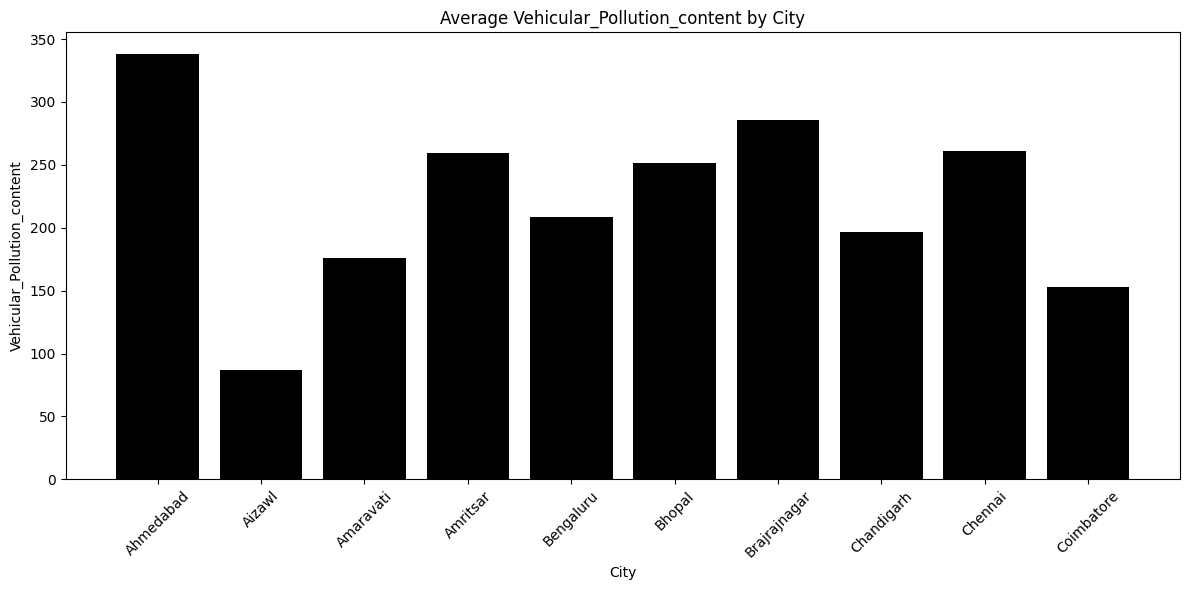

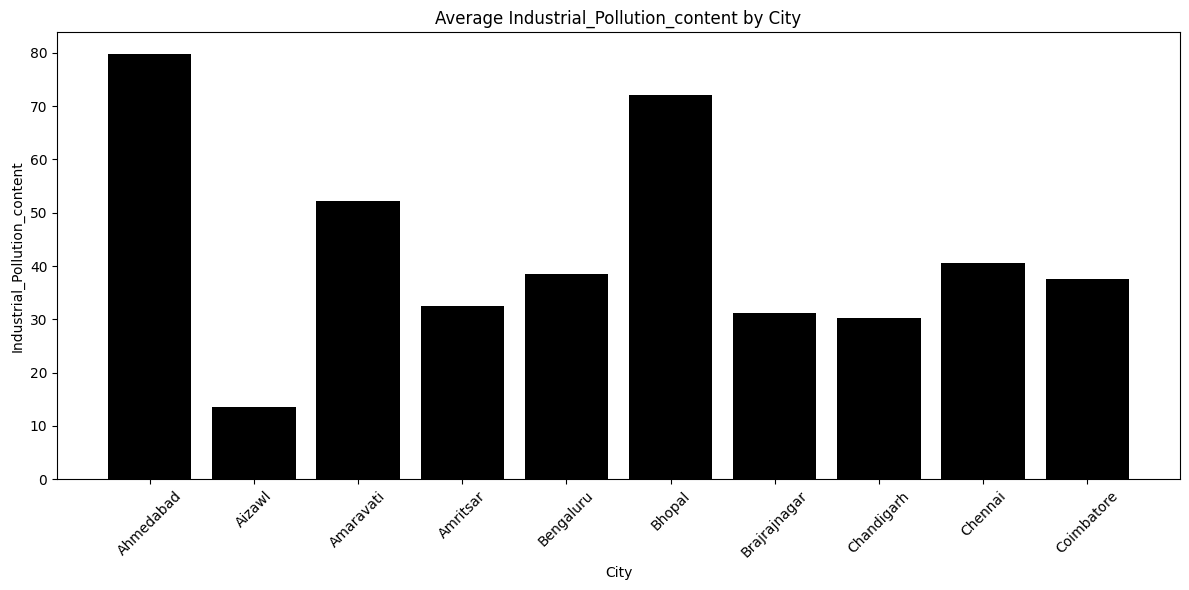

In [23]:
city_avg = df2.groupby('City')[['Vehicular_Pollution_content', 'Industrial_Pollution_content']].mean().reset_index().head(10)
def plot_avg_pollution(var):
    plt.figure(figsize=(12, 6))
    plt.bar(city_avg['City'], city_avg[var], color='black')
    plt.title(f'Average {var} by City')
    plt.xlabel('City')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_avg_pollution('Vehicular_Pollution_content')
plot_avg_pollution('Industrial_Pollution_content')

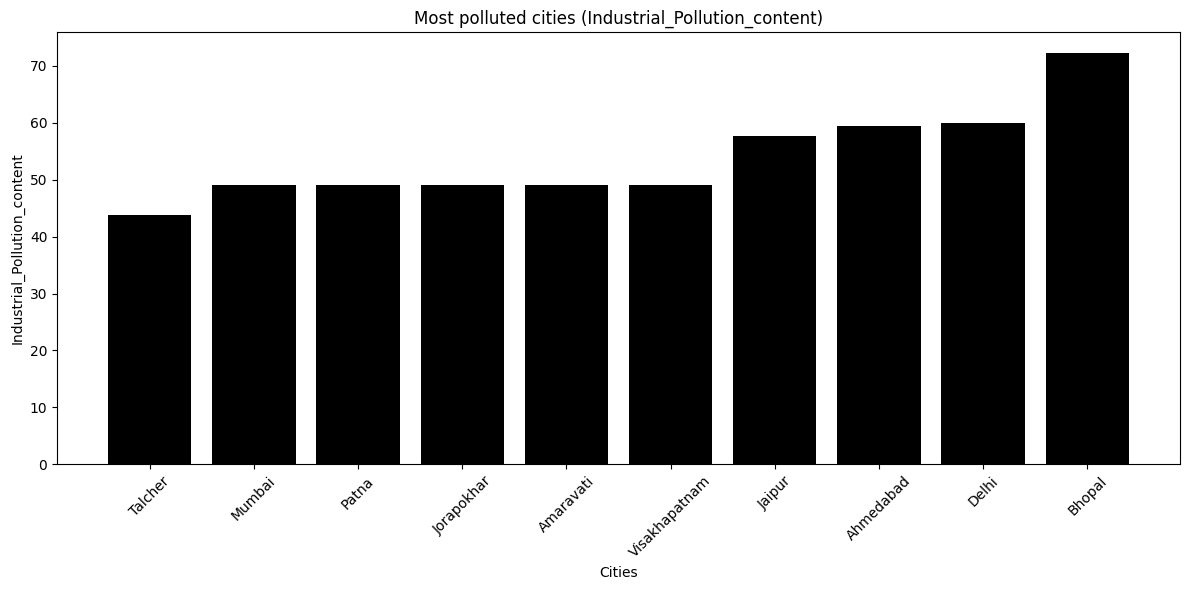

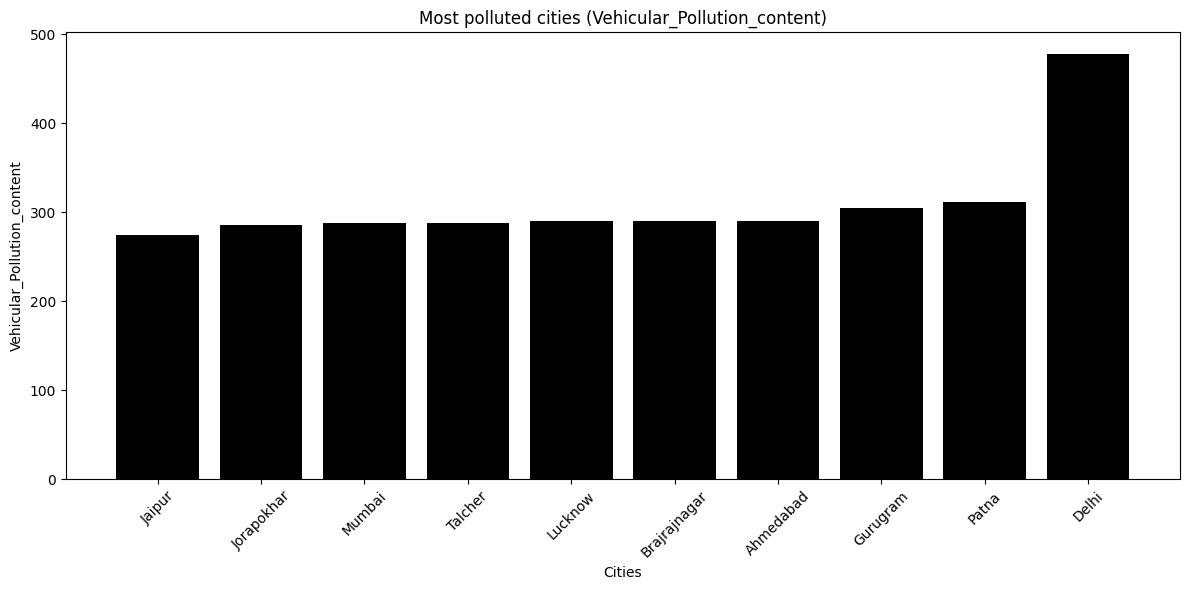

In [24]:
def max_bar_plot(var):
    df_temp = df2.reset_index()
    data = df_temp[['City', var]].groupby(["City"]).median().sort_values(by=var, ascending=True).tail(10)
    plt.figure(figsize=(12, 6))
    plt.bar(data.index, data[var], color='black')
    plt.title(f'Most polluted cities ({var})')
    plt.xlabel('Cities')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
p1 = max_bar_plot('Industrial_Pollution_content')
p2 = max_bar_plot('Vehicular_Pollution_content')

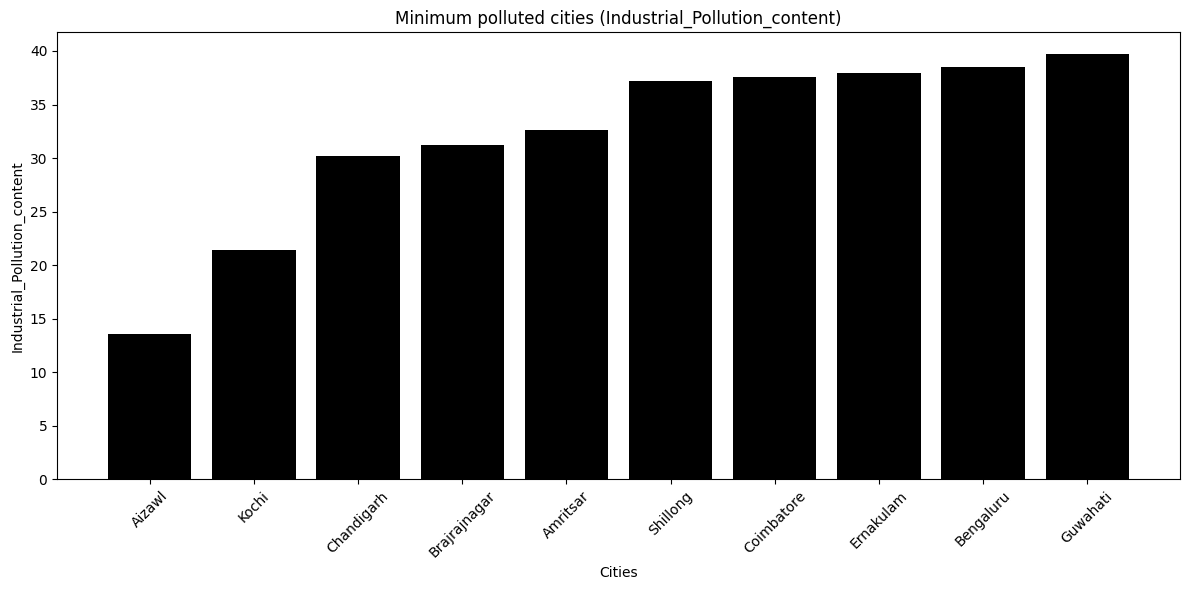

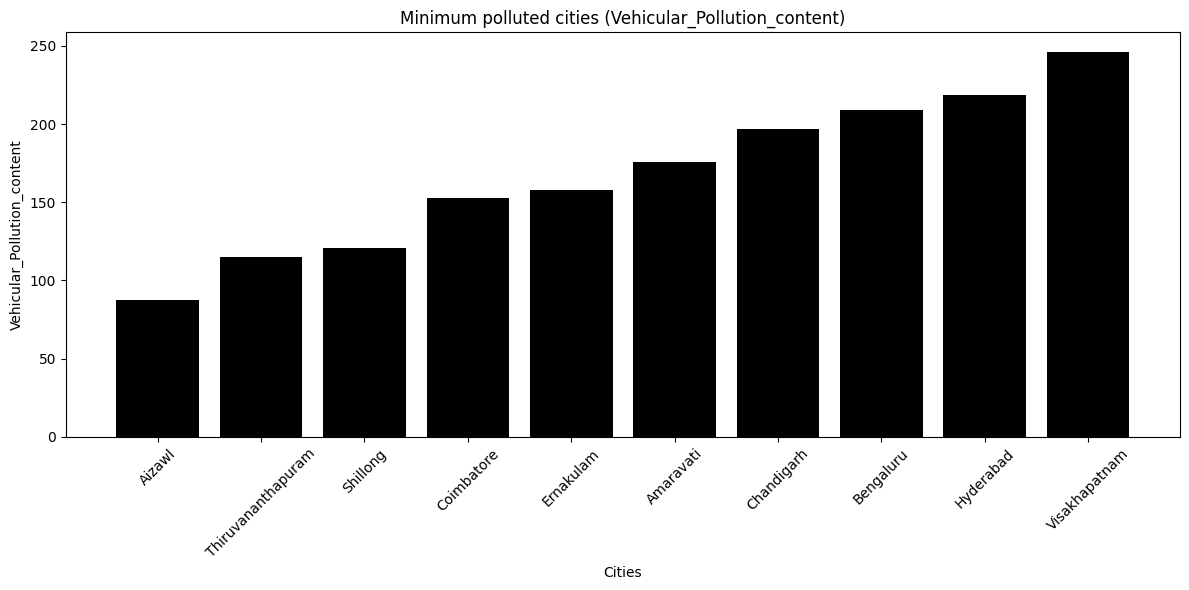

In [25]:
def min_bar_plot(var):
    df_temp = df2.reset_index()
    data = df_temp[['City', var]].groupby(["City"]).mean().sort_values(by=var, ascending=True).head(10)
    plt.figure(figsize=(12, 6))
    plt.bar(data.index, data[var], color='black')
    plt.title(f'Minimum polluted cities ({var})')
    plt.xlabel('Cities')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
p1 = min_bar_plot('Industrial_Pollution_content')
p2 = min_bar_plot('Vehicular_Pollution_content')

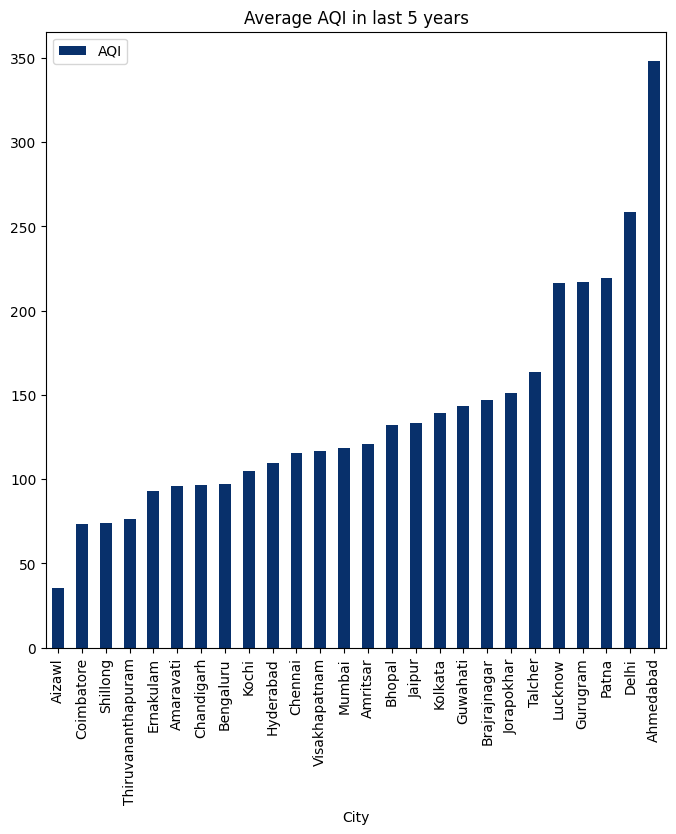

In [26]:
df.reset_index(inplace=True)
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

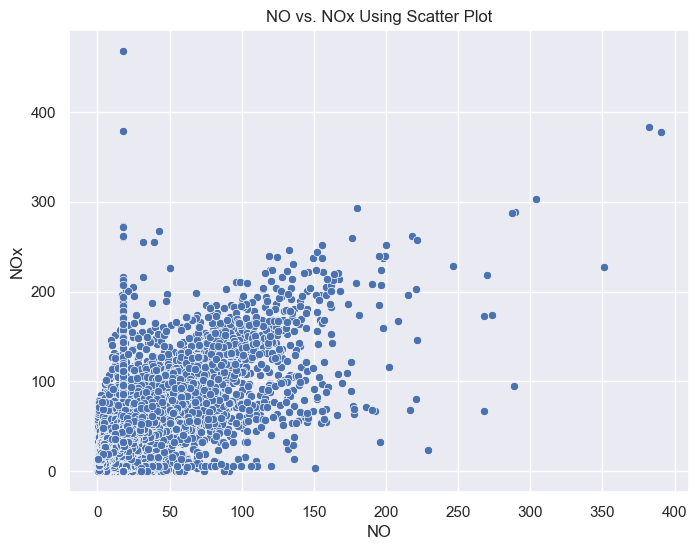

In [27]:
'''From above heatmap we observe a strong correlation of NO with NOx so lets visualize them with the help of scatterplots'''
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO', y='NOx', data=df)
plt.title('NO vs. NOx Using Scatter Plot')
plt.show()

### 4. MODEL TRAINING:

In [28]:
df = df.drop(columns = ['Date', 'Month', 'Year', 'City'], axis=1)
df

,index,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,149.0,Moderate
1,1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,123.0,Moderate
2,2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,300.0,Poor
3,3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,123.0,Moderate
4,4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,329.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Good
29527,29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Satisfactory
29528,29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Satisfactory
29529,29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Satisfactory


#### 4.1. TRAIN-TEST SPLIT:

In [29]:
y = df["AQI"]
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22148, 9) (7383, 9) (22148,) (7383,)


#### 4.2. SUPERVISED LEARNING:

In [30]:
# Importing all Models.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
# 1. Linear Regression Model
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

In [32]:
# 2. Polynomial Regression Model:
# Degree = 2
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [33]:
# 3. Decision Tree Tegression Model:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

In [34]:
# 4. Random Forest Regression Model
# Random Forest with 150 trees
rt_reg = RandomForestRegressor(n_estimators = 150, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

#### 4.3. SL MODEL EVALUATION:

In [35]:
# Error Estimation Methods
# Test Data prediction

#----- Multiple Linear Regresion -------
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)

#----- Polynomial Regression ------------ 
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)

#----- Decision Tree Regression ---------
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)

#----- Random Forest Regression ---------
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)

# Training Data Prediction
#----- multiple linear regresion -------
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))

#------ polynomial regression ---------
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))

#----- decision tree regression ---------
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))

# ----- random forest regression -----
rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train)))
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))

# RESULTS
print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_mlr,rmse_mlr,mae_mlr))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(r2_pr,rmse_pr,mae_pr))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_dt,rmse_dt,mae_dt))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_rt,rmse_rt,mae_rt))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.8415	52.7055	29.9307
Polynomial Regression    	0.88	46.61	27.303
Decision Tree Regression 	0.9996	2.5381	0.1286
Random Forest Regression 	0.9855	15.9678	7.1393


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.8361	53.5648	30.7398
Polynomial Regression    	0.86	49.01	28.192
Decision Tree Regression 	0.8233	55.6215	26.0762
Random Forest Regression 	0.9008	41.6835	18.8264


#### 4.4. PREDICTIONS OF ALL ABOVE SL MODELS:

In [36]:
# Sample input data for prediction
sample_input = pd.DataFrame([[26, 50, 1, 19, 18, 23, 1, 3, 42]],
                            columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'])

# Predict AQI using the trained models
mlr_prediction = mreg.predict(sample_input)
pr_prediction = preg.predict(poly_reg.transform(sample_input))
dt_prediction = dec_tree.predict(sample_input)
rt_prediction = rt_reg.predict(sample_input)

# Define AQI quality labels
aqi_quality_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

# Determine AQI quality based on AQI value
def get_aqi_quality(aqi):
    if aqi <= 50:
        return aqi_quality_labels[0]
    elif aqi <= 100:
        return aqi_quality_labels[1]
    elif aqi <= 200:
        return aqi_quality_labels[2]
    elif aqi <= 300:
        return aqi_quality_labels[3]
    else:
        return aqi_quality_labels[4]

# Get AQI quality for each prediction
mlr_aqi_quality = get_aqi_quality(mlr_prediction)
pr_aqi_quality = get_aqi_quality(pr_prediction)
dt_aqi_quality = get_aqi_quality(dt_prediction)
rt_aqi_quality = get_aqi_quality(rt_prediction)

# Print the predicted AQI and AQI quality
print("Multiple Linear Regression Prediction:")
print("AQI:", mlr_prediction)
print("AQI Quality:", mlr_aqi_quality)
print()
print("Polynomial Regression Prediction:")
print("AQI:", pr_prediction)
print("AQI Quality:", pr_aqi_quality)
print()
print("Decision Tree Regression Prediction:")
print("AQI:", dt_prediction)
print("AQI Quality:", dt_aqi_quality)
print()
print("Random Forest Regression Prediction:")
print("AQI:", rt_prediction)
print("AQI Quality:", rt_aqi_quality)

Multiple Linear Regression Prediction:
AQI: [73.90939499]
AQI Quality: Satisfactory

Polynomial Regression Prediction:
AQI: [73.06182621]
AQI Quality: Satisfactory

Decision Tree Regression Prediction:
AQI: [66.]
AQI Quality: Satisfactory

Random Forest Regression Prediction:
AQI: [75.02666667]
AQI Quality: Satisfactory


#### 4.5. UNSUPERVISED LEARNING:

In [37]:
# Importing all Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

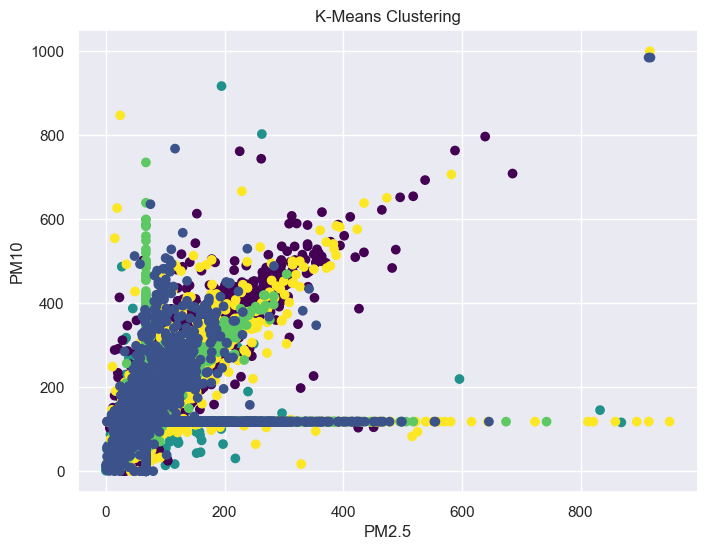

In [38]:
# 1. K-Means Clustering:
# Drop AQI and Air_quality columns as they are not used for clustering
X = df.drop(columns=['AQI', 'Air_quality'])

# Perform K-Means clustering with k=3 (you can change the number of clusters as needed)
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming PM2.5 and PM10 are plotted on a scatter plot)
plt.scatter(df['PM2.5'], df['PM10'], c=df['cluster'], cmap='viridis')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('K-Means Clustering')
plt.show()

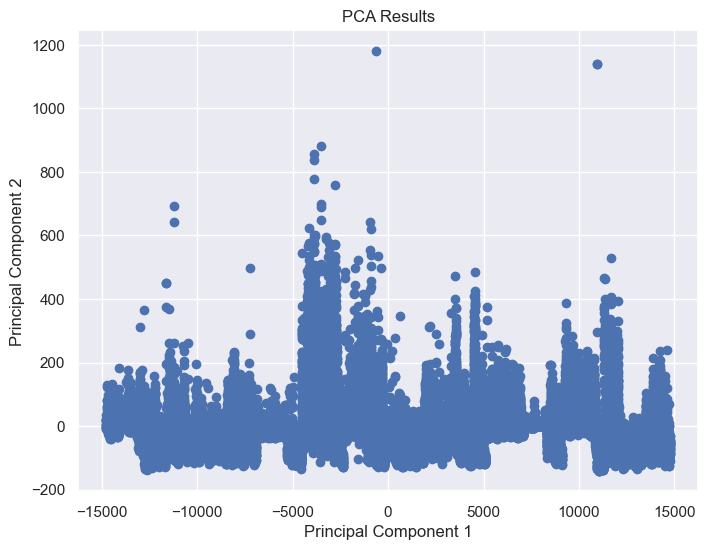

In [39]:
# 2. Principal Component Analysis:
Y = df.drop(columns=['AQI', 'Air_quality'])

# Perform PCA with the number of components you desire (let's say 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Y)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA results (assuming PCA1 and PCA2 are plotted on a scatter plot)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

### 5. CROSS-VALIDATION & FINE TUNING:

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=0)
# Define the hyperparameters grid for GridSearchCV
param_grid = {'n_estimators': [10, 50, 100],'max_depth': [None, 5, 10]}
# Initialize GridSearchCV with the Random Forest model and hyperparameters grid
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)
# Perform cross-validation and find the best hyperparameters
grid_search.fit(x_train, y_train)
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [43]:
# ML-FLOW
import warnings
import mlflow
import mlflow.sklearn
warnings.filterwarnings("ignore", message="Setuptools is replacing distutils.")
mlflow.set_experiment('Air_Quality_Model')

# Start the mlflow run to track the experiment
with mlflow.start_run():
    # Log the hyperparameters and any other relevant information
    mlflow.log_params(best_params)

    # Train and evaluate the model
    y_pred_train = best_rf.predict(x_train)
    y_pred_test = best_rf.predict(x_test)

    # Log metrics
    mlflow.log_metric("train_rmse", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    mlflow.log_metric("test_rmse", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    mlflow.log_metric("r2_score", r2_score(y_test, y_pred_test))

    # Save the model
    mlflow.sklearn.log_model(best_rf, "random_forest_model")

2025/07/02 10:37:24 INFO mlflow.tracking.fluent: Experiment with name 'Air_Quality_Model' does not exist. Creating a new experiment.
2025/07/02 10:37:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 10:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Using RANDOM FOREST for Regression - Highest Accuracy , Highest R-squared (R^2) Score & Lowest Root Mean Squared Error (RMSE) 

In [44]:
# Training the model:
Best_Model_RF = RandomForestRegressor(n_estimators = 150, random_state = 0)
Best_Model_RF.fit(x_train,y_train)
Best_Model_RF_predict = Best_Model_RF.predict(x_test)

# Model Evaluation:
# Error Estimation Methods

# Test Data prediction
rmse_r = sqrt(metrics.mean_squared_error(y_test, Best_Model_RF_predict))
mae_r = metrics.mean_absolute_error(y_test, Best_Model_RF_predict)
r2_r = metrics.r2_score(y_test,Best_Model_RF_predict)

# Training Data Prediction
# ----- random forest regression -----
rf_ytp_rms = sqrt(metrics.mean_squared_error(y_train, Best_Model_RF.predict(x_train)))
rf_ytp_ma = metrics.mean_absolute_error(y_train, Best_Model_RF.predict(x_train))
rf_ytp_r = metrics.r2_score(y_train, Best_Model_RF.predict(x_train))

# RESULTS
print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r,rf_ytp_rms,rf_ytp_ma))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_r,rmse_r,mae_r))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.9855	15.9678	7.1393


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.9008	41.6835	18.8264


### 6. MODEL DEPLOYMENT:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib  
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
target = 'AQI'
x = df[features]
y = df[target]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Train the model
best_model_rf = RandomForestRegressor(n_estimators=150, random_state=0)
best_model_rf.fit(x_train, y_train)

# Save the trained model with compression
model_filename = 'random_forest_model.pkl'
joblib.dump(best_model_rf, model_filename, compress=3)

(22148, 9) (7383, 9) (22148,) (7383,)
